In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\MadiL\Thesis CodeBase\Longitudinal\Individual Questions\long_data_standardized.csv")

In [ ]:
# Longitudinal analysis

# Step 1: Remove duplicate rows with the same 'Survey' and 'EndDate'
df_cleaned = df.drop_duplicates(subset=['Question', 'StartDate'])

# Step 2: Convert StartDate and EndDate to datetime format
# Modify directly on the DataFrame using .loc
df_cleaned.loc[:, 'StartDate'] = pd.to_datetime(df_cleaned['StartDate'], errors='coerce')

# Combine all question columns into one list
question_columns = ['LSAS_1', 'LSAS_2', 'LSAS_3', 'LSAS_4', 'LSAS_5', 'LSAS_6', 'LSAS_7', 'LSAS_8', 'LSAS_9', 'LSAS_10',  'LSAS_11', 'LSAS_12', 'LSAS_13', 'LSAS_14', 'LSAS_15', 'LSAS_16', 'LSAS_17', 'LSAS_18', 'LSAS_19',  'LSAS_20', 'LSAS_21', 'LSAS_22', 'LSAS_23', 'LSAS_24',
'BDI1', 'BDI2', 'BDI3', 'BDI4', 'BDI5', 'BDI6', 'BDI7', 'BDI8', 'BDI9', 'BDI10', 'BDI11', 'BDI12', 'BDI13', 'BDI14', 'BDI15', 'BDI16', 'BDI17', 'BDI18', 'BDI19', 'BDI20', 'CFS1', 'CFS2_R', 'CFS3_R', 'CFS4', 'CFS5_R', 'CFS6', 'CFS7', 'CFS8', 'CFS9', 'CFS10_R', 'CFS11', 'CFS12']


# Step 3: Split the dataset by Survey type (LSAS, BDI, CFS)
question_data = {question: df_cleaned[df_cleaned['Question'] == question] for question in question_columns}

# Verify data after cleaning and splitting
df_cleaned.info(), {k: v.shape for k, v in question_data.items()}

<class 'pandas.core.frame.DataFrame'>
Index: 5544 entries, 0 to 262128
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Participant_Number  5544 non-null   float64
 1   StartDate           5544 non-null   object 
 2   EndDate             5544 non-null   object 
 3   Question            5544 non-null   object 
 4   Score               5544 non-null   float64
dtypes: float64(2), object(3)
memory usage: 259.9+ KB


(None,
 {'LSAS_1': (99, 5),
  'LSAS_2': (99, 5),
  'LSAS_3': (99, 5),
  'LSAS_4': (99, 5),
  'LSAS_5': (99, 5),
  'LSAS_6': (99, 5),
  'LSAS_7': (99, 5),
  'LSAS_8': (99, 5),
  'LSAS_9': (99, 5),
  'LSAS_10': (99, 5),
  'LSAS_11': (99, 5),
  'LSAS_12': (99, 5),
  'LSAS_13': (99, 5),
  'LSAS_14': (99, 5),
  'LSAS_15': (99, 5),
  'LSAS_16': (99, 5),
  'LSAS_17': (99, 5),
  'LSAS_18': (99, 5),
  'LSAS_19': (99, 5),
  'LSAS_20': (99, 5),
  'LSAS_21': (99, 5),
  'LSAS_22': (99, 5),
  'LSAS_23': (99, 5),
  'LSAS_24': (99, 5),
  'BDI1': (99, 5),
  'BDI2': (99, 5),
  'BDI3': (99, 5),
  'BDI4': (99, 5),
  'BDI5': (99, 5),
  'BDI6': (99, 5),
  'BDI7': (99, 5),
  'BDI8': (99, 5),
  'BDI9': (99, 5),
  'BDI10': (99, 5),
  'BDI11': (99, 5),
  'BDI12': (99, 5),
  'BDI13': (99, 5),
  'BDI14': (99, 5),
  'BDI15': (99, 5),
  'BDI16': (99, 5),
  'BDI17': (99, 5),
  'BDI18': (99, 5),
  'BDI19': (99, 5),
  'BDI20': (99, 5),
  'CFS1': (99, 5),
  'CFS2_R': (99, 5),
  'CFS3_R': (99, 5),
  'CFS4': (99, 5),
  '

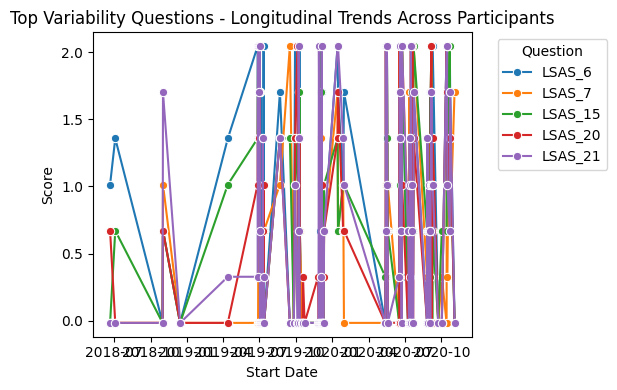

In [ ]:
# Calculate score variance for each question
score_variance = df_cleaned.groupby('Question')['Score'].var().reset_index()
score_variance = score_variance.rename(columns={'Score': 'Variance'})

# Select top 5 questions with the highest variance
top_questions = score_variance.nlargest(5, 'Variance')['Question']

# Filter data for these questions
filtered_data = df_cleaned[df_cleaned['Question'].isin(top_questions)]

# Plot trends for top-variance questions
plt.figure(figsize=(6, 4))
sns.lineplot(data=filtered_data, x='StartDate', y='Score', hue='Question', marker='o')
plt.title('Top Variability Questions - Longitudinal Trends Across Participants')
plt.xlabel('Start Date')
plt.ylabel('Score')
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group data by ParticipantID and Question, then calculate standard deviation
variability = (
    df_cleaned.groupby(['Participant_Number', 'Question'])
    .agg(WithinParticipantSD=('Score', 'std'))  # Calculate standard deviation
    .reset_index()
)

# Step 2: Highlight questions with the highest variability
high_variability = (
    variability.groupby('Question')['WithinParticipantSD']
    .mean()
    .sort_values(ascending=False)
)
print("Questions with highest within-participant variability:\n", high_variability.head(10))


Questions with highest within-participant variability:
 Question
LSAS_21    0.626566
LSAS_20    0.620394
LSAS_8     0.575861
LSAS_6     0.575440
LSAS_24    0.561707
LSAS_14    0.527656
LSAS_23    0.513992
LSAS_18    0.505870
LSAS_16    0.501867
LSAS_7     0.494097
Name: WithinParticipantSD, dtype: float64


## Full correlation matrix + Unsupervised Clustering

Summary Statistics of Correlation Matrix:
Question     LSAS_1     LSAS_2     LSAS_3     LSAS_4     LSAS_5     LSAS_6  \
count     56.000000  56.000000  56.000000  56.000000  56.000000  56.000000   
mean       0.395766   0.411155   0.335430   0.351935   0.425968   0.426892   
std        0.163507   0.196671   0.171276   0.162440   0.172132   0.186815   
min        0.013103   0.065484   0.059145   0.062183   0.027960   0.016642   
25%        0.294440   0.248838   0.235396   0.260249   0.324508   0.304119   
50%        0.407203   0.387797   0.310671   0.316735   0.414407   0.396029   
75%        0.490731   0.567348   0.386907   0.401933   0.561829   0.578911   
max        1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

Question     LSAS_7     LSAS_8     LSAS_9    LSAS_10  ...     CFS3_R  \
count     56.000000  56.000000  56.000000  56.000000  ...  56.000000   
mean       0.426846   0.379296   0.334350   0.444637  ...   0.359499   
std        0.155235   0.176699   0.1822

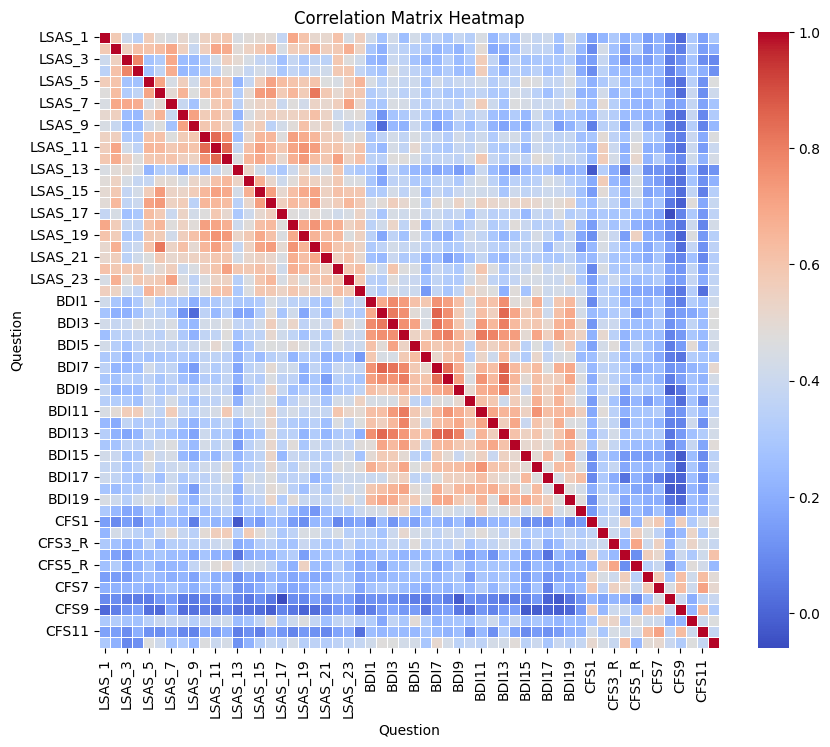

Explained Variance by each component:
[0.38227715 0.27920945]


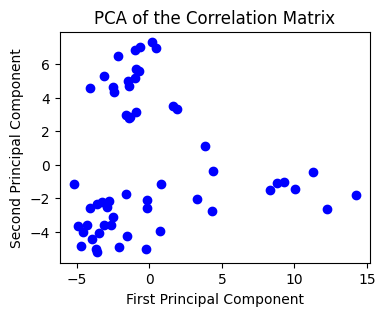

               PC1       PC2
Question                    
LSAS_1   -0.165077 -0.094314
LSAS_2   -0.159308 -0.142194
LSAS_3   -0.119412 -0.058962
LSAS_4   -0.112069 -0.048393
LSAS_5   -0.167484 -0.063067
LSAS_6   -0.158380 -0.118378
LSAS_7   -0.149522 -0.066687
LSAS_8   -0.138589 -0.129350
LSAS_9   -0.120926 -0.148428
LSAS_10  -0.150646 -0.114439
LSAS_11  -0.160864 -0.140854
LSAS_12  -0.169178 -0.125485
LSAS_13  -0.123806 -0.103783
LSAS_14  -0.161472 -0.108026
LSAS_15  -0.177234 -0.117230
LSAS_16  -0.190987 -0.026684
LSAS_17  -0.155905 -0.043365
LSAS_18  -0.172665 -0.100947
LSAS_19  -0.151894 -0.149925
LSAS_20  -0.162101 -0.128681
LSAS_21  -0.144438 -0.154048
LSAS_22  -0.170810 -0.083291
LSAS_23  -0.157949 -0.083854
LSAS_24  -0.178842 -0.064500
BDI1     -0.090601  0.210077
BDI2     -0.061899  0.224060
BDI3     -0.115236  0.193292
BDI4     -0.095245  0.217349
BDI5     -0.117416  0.133499
BDI6     -0.064019  0.169234
BDI7     -0.077815  0.223550
BDI8     -0.071443  0.229516
BDI9     -0.08

C:\Users\MadiL\AppData\Local\Temp\ipykernel_5012\1941899256.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df['PC1'], y=loadings_df.index, palette='coolwarm')


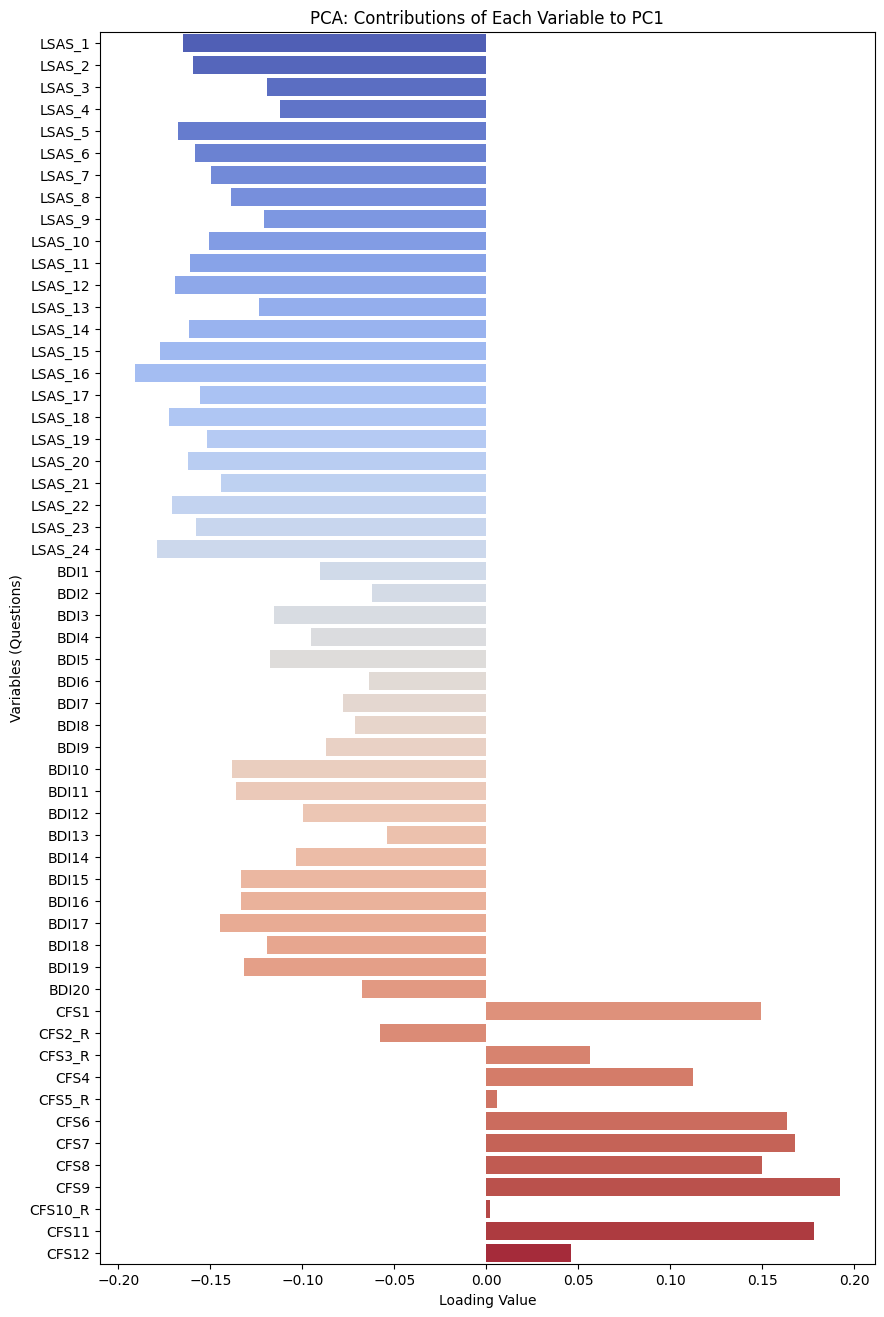

C:\Users\MadiL\AppData\Local\Temp\ipykernel_5012\1941899256.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df['PC2'], y=loadings_df.index, palette='coolwarm')


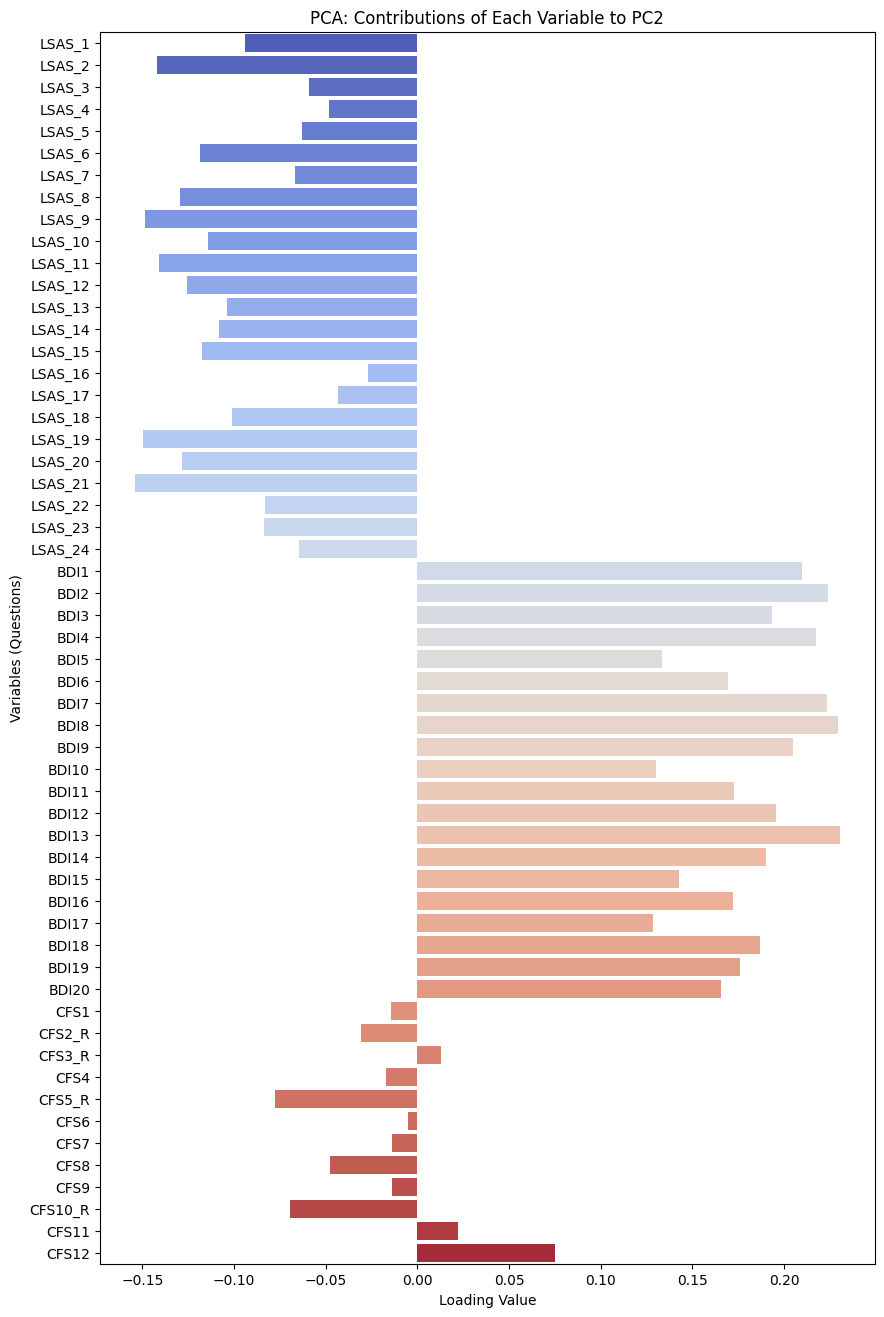

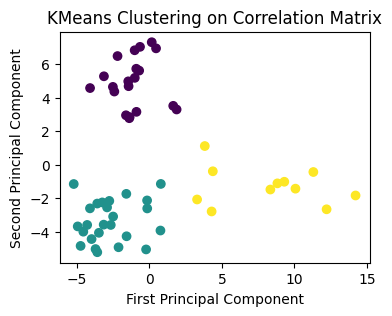

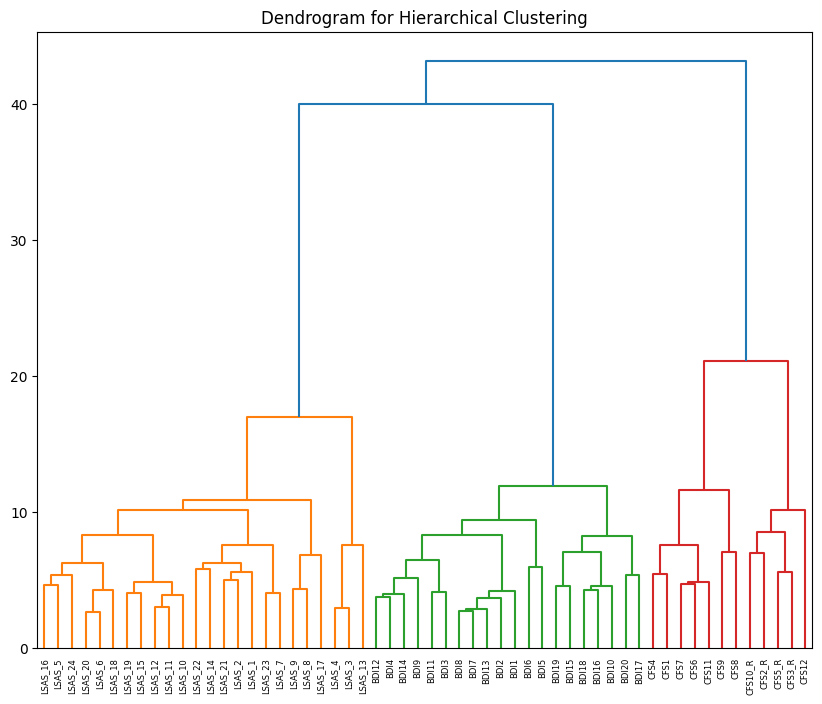

Moderately correlated pairs (above 0.7 correlation):
[('LSAS_2', 'LSAS_11', np.float64(0.7000816240625879)), ('LSAS_3', 'LSAS_4', np.float64(0.7845928417145188)), ('LSAS_5', 'LSAS_6', np.float64(0.7032037533837533)), ('LSAS_5', 'LSAS_16', np.float64(0.7091997283121453)), ('LSAS_6', 'LSAS_15', np.float64(0.7274069725988449)), ('LSAS_6', 'LSAS_16', np.float64(0.7313872534405451)), ('LSAS_6', 'LSAS_20', np.float64(0.8142820479054865)), ('LSAS_7', 'LSAS_23', np.float64(0.7123948125558006)), ('LSAS_8', 'LSAS_9', np.float64(0.7115312494494032)), ('LSAS_10', 'LSAS_11', np.float64(0.8455811677626509)), ('LSAS_10', 'LSAS_12', np.float64(0.7497070714167339)), ('LSAS_10', 'LSAS_18', np.float64(0.7152164284261859)), ('LSAS_11', 'LSAS_12', np.float64(0.8542633792222203)), ('LSAS_11', 'LSAS_15', np.float64(0.7113227701852547)), ('LSAS_11', 'LSAS_18', np.float64(0.7025408498598724)), ('LSAS_11', 'LSAS_19', np.float64(0.7514536049311582)), ('LSAS_11', 'LSAS_20', np.float64(0.7193025908934482)), ('LSAS

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

merged_df = df_cleaned.pivot_table(index=['Participant_Number', 'EndDate'], columns='Question', values='Score').reset_index()

# Correlation matrix (pairwise correlations between LSAS, BDI, and CFS scores)
correlation_matrix = merged_df[question_columns].corr()


# 1. Summary Statistics
print("Summary Statistics of Correlation Matrix:")
print(correlation_matrix.describe())

# 2. Heatmap of the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# 3. Principal Component Analysis (PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(correlation_matrix.fillna(0))  # Handle NaNs
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

print("Explained Variance by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(4, 3))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of the Correlation Matrix')
plt.show()

# Get PCA components (loadings)
loadings = pca.components_

# Create a DataFrame to view the loadings for each original variable
loadings_df = pd.DataFrame(loadings.T, columns=[f"PC{i+1}" for i in range(loadings.shape[0])], 
                            index=merged_df[question_columns].columns)

# Print the loadings to see the contributions of each variable
print(loadings_df)

# Visualize loadings using a bar plot for the first principal component
plt.figure(figsize=(10, 16))
sns.barplot(x=loadings_df['PC1'], y=loadings_df.index, palette='coolwarm')
plt.title('PCA: Contributions of Each Variable to PC1')
plt.xlabel('Loading Value')
plt.ylabel('Variables (Questions)')
plt.show()

# You can repeat for other principal components (e.g., PC2)
plt.figure(figsize=(10, 16))
sns.barplot(x=loadings_df['PC2'], y=loadings_df.index, palette='coolwarm')
plt.title('PCA: Contributions of Each Variable to PC2')
plt.xlabel('Loading Value')
plt.ylabel('Variables (Questions)')
plt.show()

# 4. KMeans Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

plt.figure(figsize=(4, 3))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on Correlation Matrix')
plt.show()

# 5. Hierarchical Clustering (Dendrogram)
linked = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 8))
dendrogram(linked, labels=list(correlation_matrix.columns), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# 6. Find Correlated Pairs
threshold = 0.7
highly_correlated_pairs = np.where(correlation_matrix > threshold)
highly_correlated = [(correlation_matrix.columns[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
                    for x, y in zip(*highly_correlated_pairs) if x != y and x < y]
print(f"Moderately correlated pairs (above {threshold} correlation):")
print(highly_correlated)


## Just CFS Correlation Matrix

<Axes: xlabel='Question', ylabel='Question'>

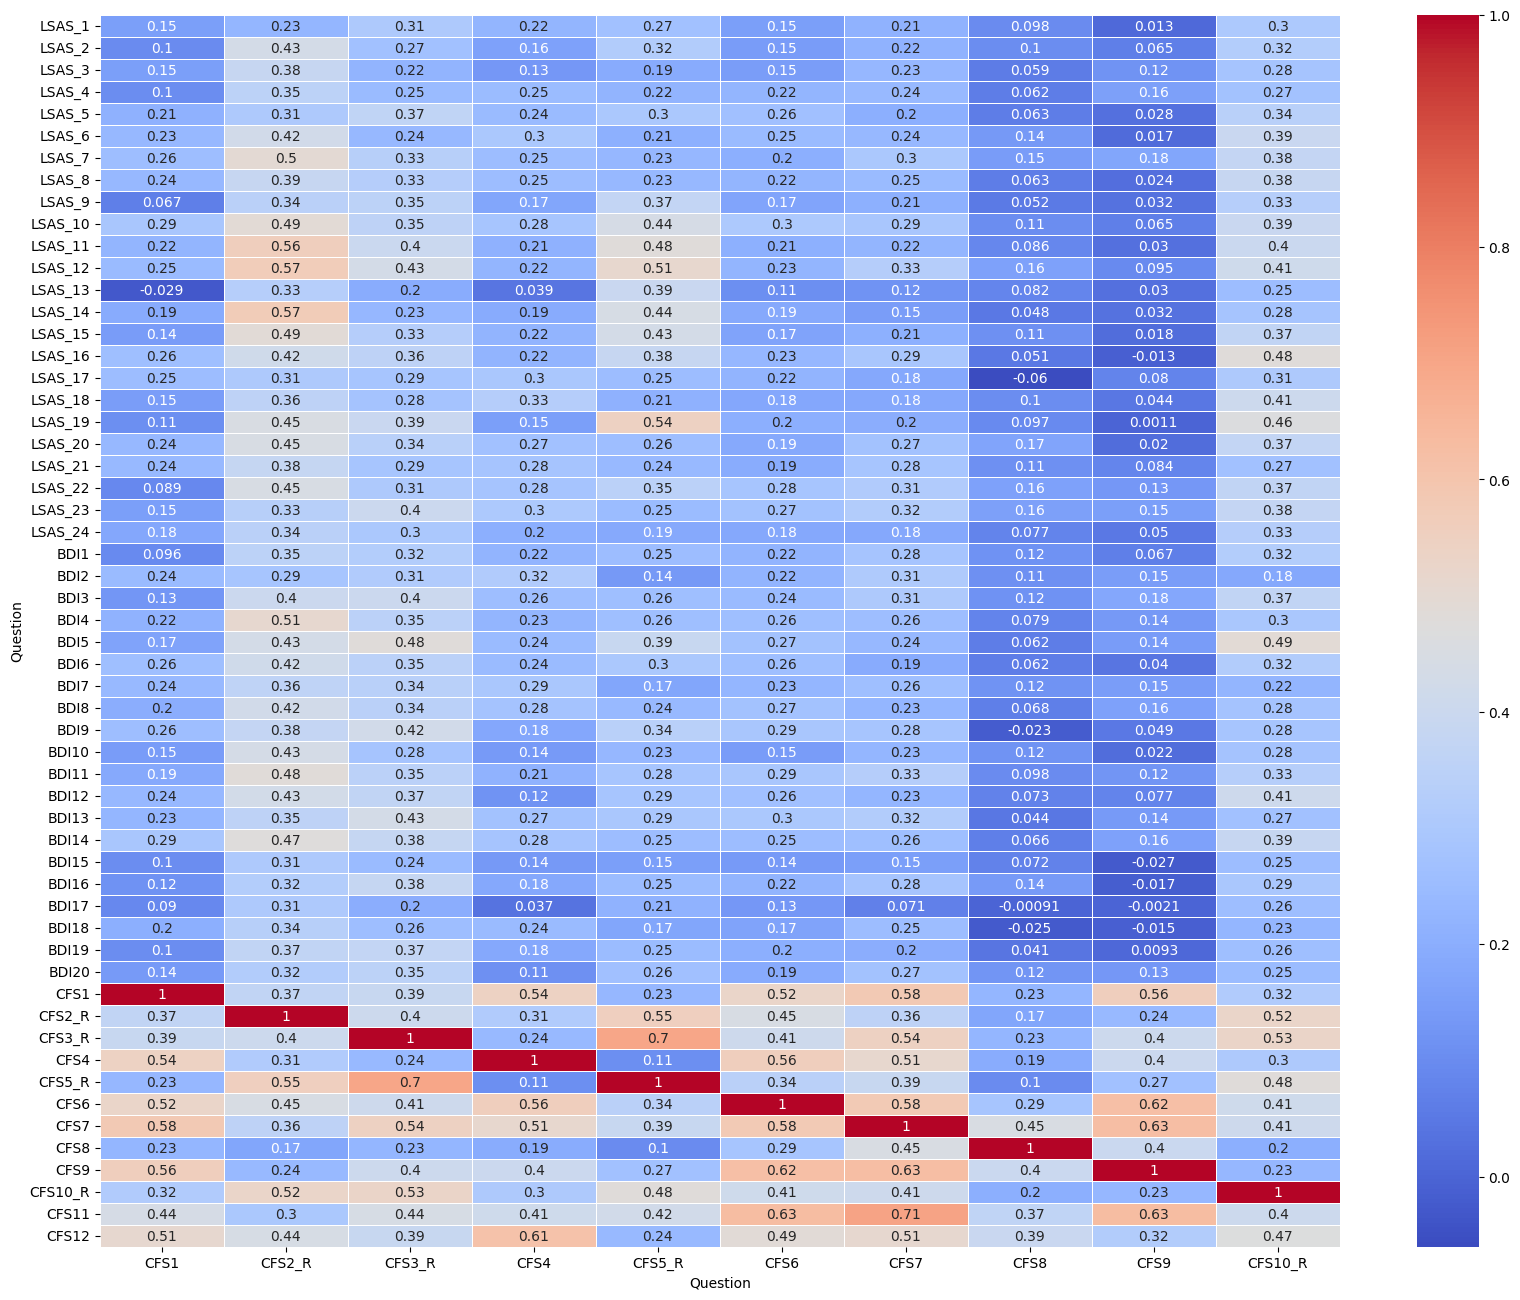

In [7]:

# Visualize the correlation matrix for CFS questions
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix.loc[:, ['CFS1', 'CFS2_R', 'CFS3_R', 'CFS4', 'CFS5_R', 'CFS6', 'CFS7', 'CFS8', 'CFS9', 'CFS10_R']], annot=True, cmap='coolwarm', linewidths=0.5)

In [8]:

print("Number of timepoints:", df['EndDate'].nunique())


Number of timepoints: 4648
